In [13]:
from sim import Simulator, SimConfig
from miner import *
from network import *
from strategy import *
from consts import *

import dataclasses
import matplotlib.pyplot as plt
import pandas as pd

network = dataclasses.replace(MAINNET_FEB_2023, token_lease_fee=0.20)
epochs = 3 * YEAR + 1
stats_interval = DAY

In [14]:
cfg = SimConfig(
    network=network,
    miner=MinerConfig(balance=0),
    strategy=StrategyConfig.pledge_limited(1000.0, 3 * YEAR, True)
)
stats = Simulator(cfg).run_all(epochs, stats_interval)
d = pd.DataFrame(data=stats)
d

,day,epoch,power,balance,lease,pledge_required,pledge_locked,shortfall,shortfall_pct,available,net_equity,reward_earned,shortfall_fee_burned,lease_fee_accrued
0,0,0,331262237605888,1000.0000,1000.0002,2099.5805,1000.0000,1099.5805,52.37,0.0000,-0.0002,0.0000,0.0000,0.0002
1,1,2880,331262237605888,1003.0111,1000.5453,2099.5805,1003.0111,1096.5694,52.23,0.0000,2.4658,4.0169,1.0028,0.5483
2,2,5760,331262237605888,1006.0191,1001.0848,2099.5805,1006.0191,1093.5614,52.08,0.0000,4.9343,8.0338,2.0029,1.0967
3,3,8640,331262237605888,1009.0240,1001.6188,2099.5805,1009.0240,1090.5565,51.94,0.0000,7.4052,12.0508,3.0002,1.6454
4,4,11520,331262237605888,1012.0258,1002.1472,2099.5805,1012.0258,1087.5547,51.80,0.0000,9.8786,16.0677,3.9948,2.1943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,1091,3142080,331262237605888,3893.3832,0.0000,2099.5805,2099.5806,-0.0001,-0.00,1793.8026,3893.3832,4382.4608,221.3105,267.7670
1092,1092,3144960,331262237605888,3897.4001,0.0000,2099.5805,2099.5806,-0.0001,-0.00,1797.8195,3897.4001,4386.4777,221.3105,267.7670
1093,1093,3147840,331262237605888,3901.4170,0.0000,2099.5805,2099.5806,-0.0001,-0.00,1801.8364,3901.4170,4390.4946,221.3105,267.7670
1094,1094,3150720,331262237605888,3905.4340,0.0000,2099.5805,2099.5806,-0.0001,-0.00,1805.8534,3905.4340,4394.5115,221.3105,267.7670


<Figure size 640x480 with 0 Axes>

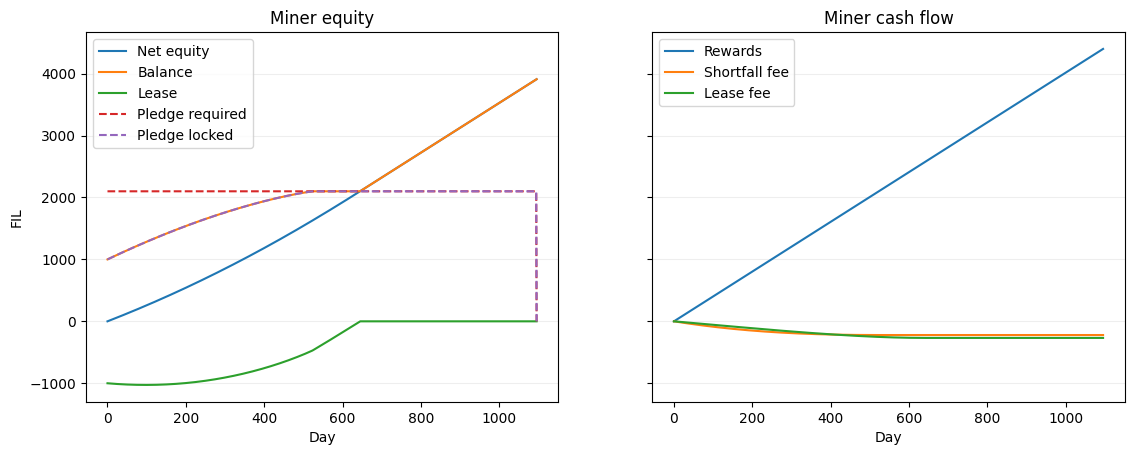

In [15]:
plt.figure()
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(13.4, 4.8))

# Balance sheet
ax1.grid(axis='y', color='#EEE')
ax1.plot(d['day'], d['net_equity'], label="Net equity")
ax1.plot(d['day'], d['balance'], label="Balance")
ax1.plot(d['day'], -d['lease'], label="Lease")
ax1.plot(d['day'], d['pledge_required'], '--', label="Pledge required")
ax1.plot(d['day'], d['pledge_locked'], '--', label="Pledge locked")
ax1.set_title("Miner equity")
ax1.set_xlabel("Day")
ax1.set_ylabel("FIL")
ax1.legend()

# PnL
ax2.grid(axis='y', color='#EEE')
ax2.plot(d['day'], d['reward_earned'], label="Rewards")
ax2.plot(d['day'], -d['shortfall_fee_burned'], label="Shortfall fee")
ax2.plot(d['day'], -d['lease_fee_accrued'], label="Lease fee")
ax2.set_title("Miner cash flow")
ax2.set_xlabel("Day")
ax2.legend()

plt.show()

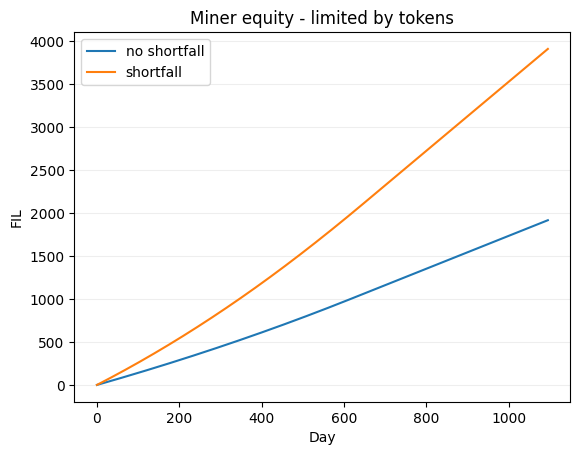

In [16]:
cfgs = {
    'no shortfall': SimConfig(
        network=network,
        miner=MinerConfig(balance=0),
        strategy=StrategyConfig.pledge_limited(1000.0, 3 * YEAR, False)
    ),
    'shortfall': SimConfig(
        network=network,
        miner=MinerConfig(balance=0),
        strategy=StrategyConfig.pledge_limited(1000.0, 3 * YEAR, True)
    )
}

statss = {label: pd.DataFrame(Simulator(cfg).run_all(epochs, stats_interval)) for (label, cfg) in cfgs.items()}

plt.grid(axis='y', color='#EEE')
for label, d in statss.items():
    plt.plot(d['day'], d['net_equity'], label=label)

plt.plot()
plt.title("Miner equity - limited by tokens")
plt.xlabel("Day")
plt.ylabel("FIL")
plt.legend()
plt.show()


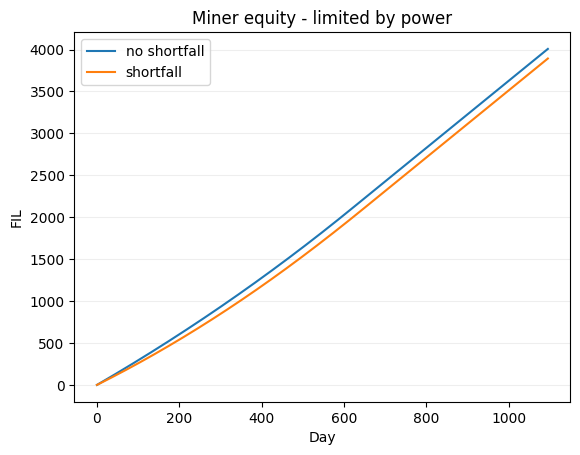

In [17]:
cfgs = {
    'no shortfall': SimConfig(
        network=network,
        miner=MinerConfig(balance=0),
        strategy=StrategyConfig.power_limited(300*TIBIBYTE, 3*YEAR, False)
    ),
    'shortfall': SimConfig(
        network=network,
        miner=MinerConfig(balance=0),
        strategy=StrategyConfig.power_limited(300*TIBIBYTE, 3*YEAR, True)
    )
}

statss = {label: pd.DataFrame(Simulator(cfg).run_all(epochs, stats_interval)) for (label, cfg) in cfgs.items()}

plt.grid(axis='y', color='#EEE')
for label, d in statss.items():
    plt.plot(d['day'], d['net_equity'], label=label)

plt.plot()
plt.title("Miner equity - limited by power")
plt.xlabel("Day")
plt.ylabel("FIL")
plt.legend()
plt.show()